## 1. Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 2. Data

In [4]:
from PIL import Image
import torchvision.transforms as transforms

imsize = 256
img_transforms = transforms.Compose([
    transforms.Resize((imsize, imsize)), 
    transforms.ToTensor()
])

In [5]:
def image_loader(image_name):
    image = Image.open(image_name)
    image = img_transforms(image).unsqueeze(0)
    return image.to(device, torch.float)

content_img = image_loader("content_img.jpg")

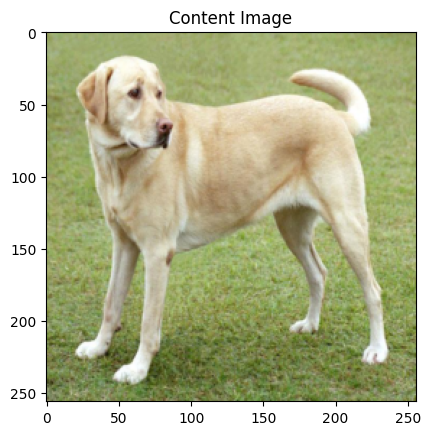

In [6]:
def imshow(tensor, title=None):
    image = tensor.cpu().clone() 
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)


plt.figure()
imshow(content_img, title='Content Image')

## 3. Loss Functions

In [7]:
ContentLoss = nn.MSELoss()

## 4. Training

In [8]:
import torch.optim as optim

target_img = torch.rand(content_img.shape).to(device)
target_img = target_img.requires_grad_(True)
optimizer = optim.Adam([target_img], lr=0.02)

In [9]:
STEPS = 100

for step in range(STEPS):
    optimizer.zero_grad()    

    content_loss = ContentLoss(content_img, target_img)
    content_loss.backward()
    optimizer.step()    
    
    with torch.no_grad():
        target_img.clamp_(0, 1)

    if step % 10 == 0:
        print(f"Epoch [{step+1}/{STEPS}] Content loss: {content_loss.item():.6f}")
        
        fname = '1.L2_UsingInput/at_%d.png' % (step+1)
        print(target_img[0].detach().cpu().permute(1, 2, 0).numpy().shape)
        mpl.image.imsave(fname, target_img[0].detach().cpu().permute(1, 2, 0).numpy())

Epoch [1/100] Content loss: 0.121890
(256, 256, 3)
Epoch [11/100] Content loss: 0.042614
(256, 256, 3)
Epoch [21/100] Content loss: 0.012632
(256, 256, 3)
Epoch [31/100] Content loss: 0.003542
(256, 256, 3)
Epoch [41/100] Content loss: 0.001083
(256, 256, 3)
Epoch [51/100] Content loss: 0.000385
(256, 256, 3)
Epoch [61/100] Content loss: 0.000144
(256, 256, 3)
Epoch [71/100] Content loss: 0.000053
(256, 256, 3)
Epoch [81/100] Content loss: 0.000019
(256, 256, 3)
Epoch [91/100] Content loss: 0.000007
(256, 256, 3)


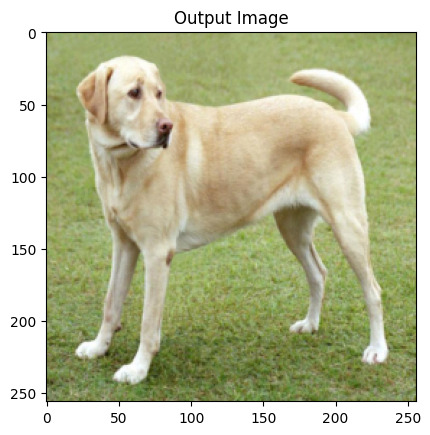

In [10]:
plt.figure()
imshow(target_img.detach(), title='Output Image')
plt.show()